# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- To identify which variables are significant in predicting the demand for shared bikes.

- To create a linear model that quantitatively relates total number of bike rentals (bike demands) with variables such as year, month, holiday, weekday, working day, temp etc.

- To know the accuracy of the model, i.e. How well those variables describe the bike demands.

**So interpretation is important!**

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

# Following steps for final model:

1) Reading and understanding the data

2) Visualizing the data

3) Preparing the data for model training 

4) Splitting the Data into Training and Testing Sets

5) Building a linear model

6) Residual Analysis of the train data

7) Making Predictions and Evaluation using the Final Model

# Step 1: Reading and Understanding the Data

Let us first import libraries for model building

In [1]:
#Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
pd.set_option('display.max_columns', 100)

import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split # It helps to split the data set into two part: Training and Test Data set
from sklearn.preprocessing import MinMaxScaler # It is used to scale the data variables or coloumns

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# ibrary used to build linear model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Reading data from dataset
boombikes_data= pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
boombikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect various aspects of the Bike-Sharing dataframe

In [4]:
#Shape of dataset
boombikes_data.shape

(730, 16)

In [5]:
boombikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis

- Convert season, weathersit, weekday and month into categorical variables

In [7]:
boombikes_data.season = boombikes_data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

boombikes_data.weathersit = boombikes_data.weathersit.map({1:'good',2:'moderate',3:'bad',4:'extreme'})

boombikes_data.mnth = boombikes_data.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',
                                                     8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

boombikes_data.weekday = boombikes_data.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

boombikes_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,dec,0,thu,1,moderate,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,dec,0,fri,1,moderate,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,dec,0,sat,0,moderate,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,dec,0,sun,0,good,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Dropping columns
- 'casual' and 'registered', as we would be using 'cnt' as target varibale which contains sum of both
- 'instant' as it  is unique sequence number which won't be useful in our analysis
- 'dteday' as we already have column for year and month

In [8]:
boombikes_data = boombikes_data.drop(['casual','registered','instant', 'dteday'], axis=1)

In [9]:
boombikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


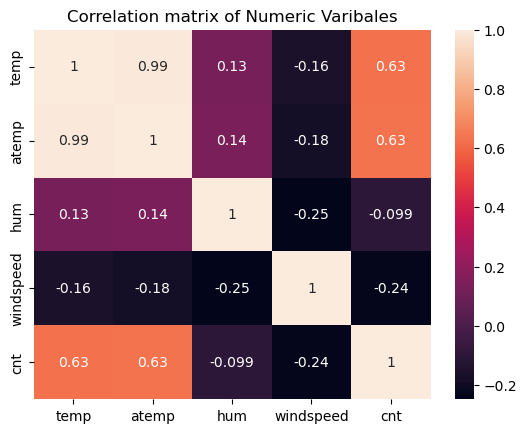

In [10]:
#Heat map for correlation
sns.heatmap(boombikes_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)
plt.title('Correlation matrix of Numeric Varibales')
plt.show()

### From the above heatmap it is evident that temp and atemp are highly corelated so atemp can be dropped



In [11]:
#Dropping atemp variable
boombikes_data = boombikes_data.drop(['atemp'], axis=1)



# Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable


### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

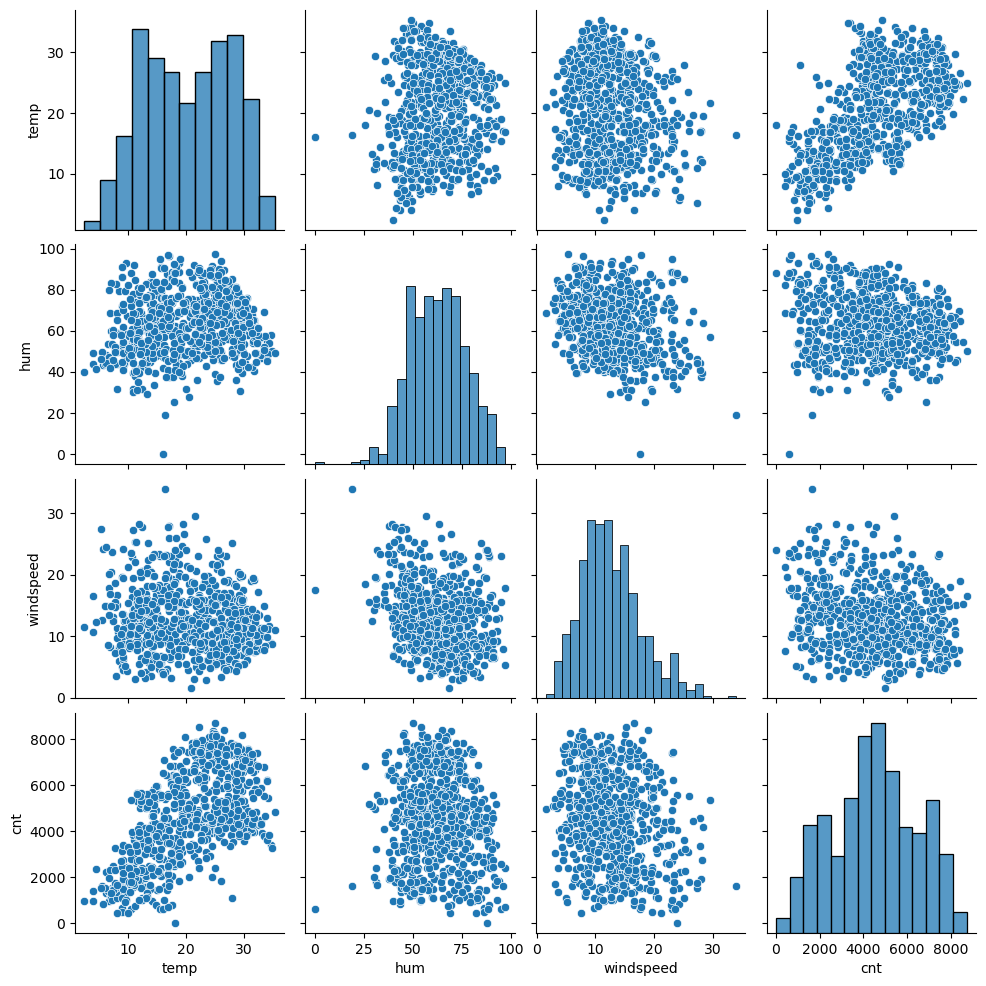

In [12]:
sns.pairplot(boombikes_data[['temp','hum','windspeed','cnt']])
plt.show()

## Observation:
- 'cnt' total count of rental bike demand is correlated with temp

### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for these variables.

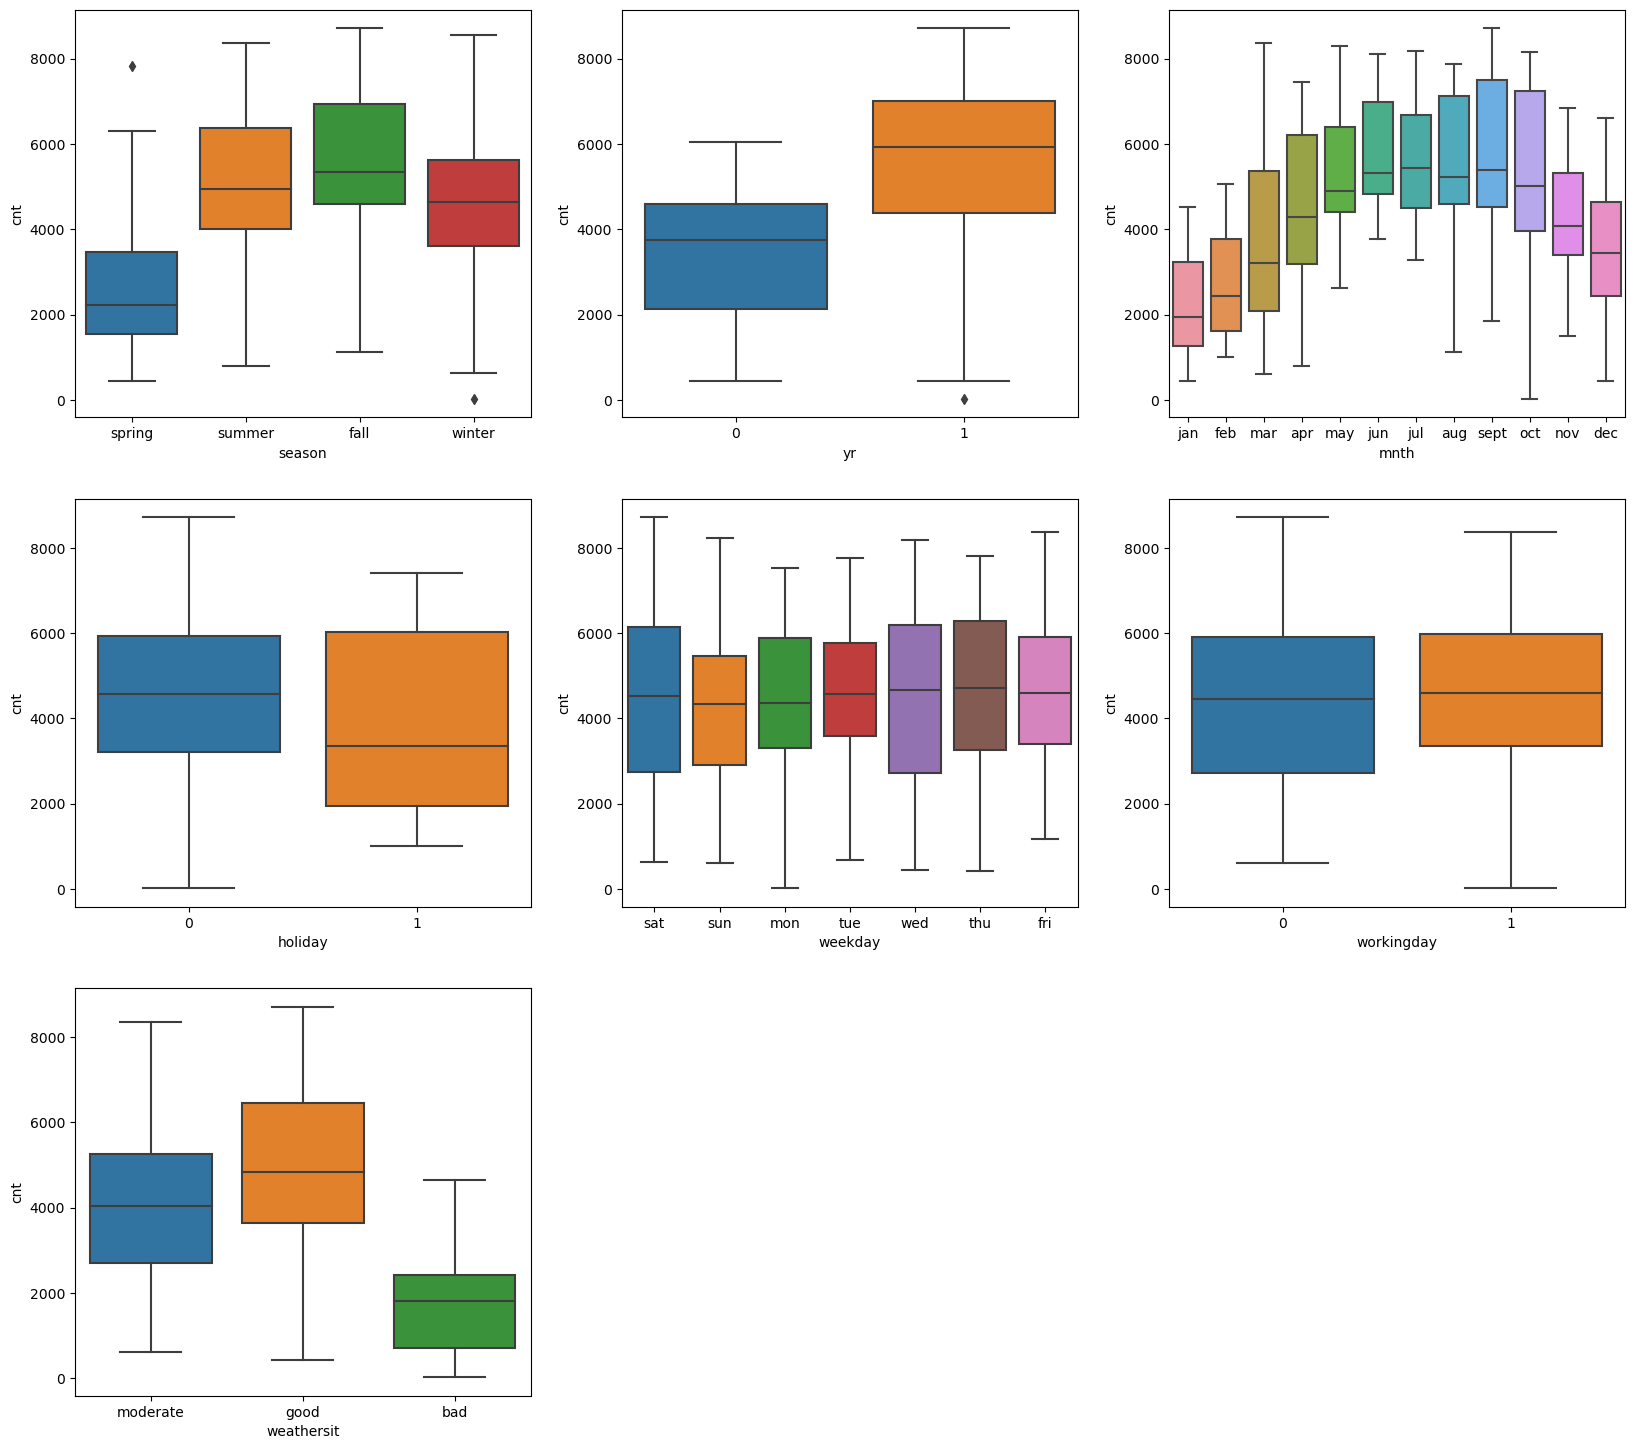

In [13]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = boombikes_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes_data)
plt.show()

## Observation:

- Demand of rental bike is highest during 'fall' season followed by 'summer', then 'winter' and least during 'spring'
- There is an increase in demand, on year on year basis(from 2018 to 2019)
- People tend to rent bike in a good weather suituation
- Wednesdays and Saturdays has a significant demand 

## Normal Probability Plot to identify substantive departures from normality

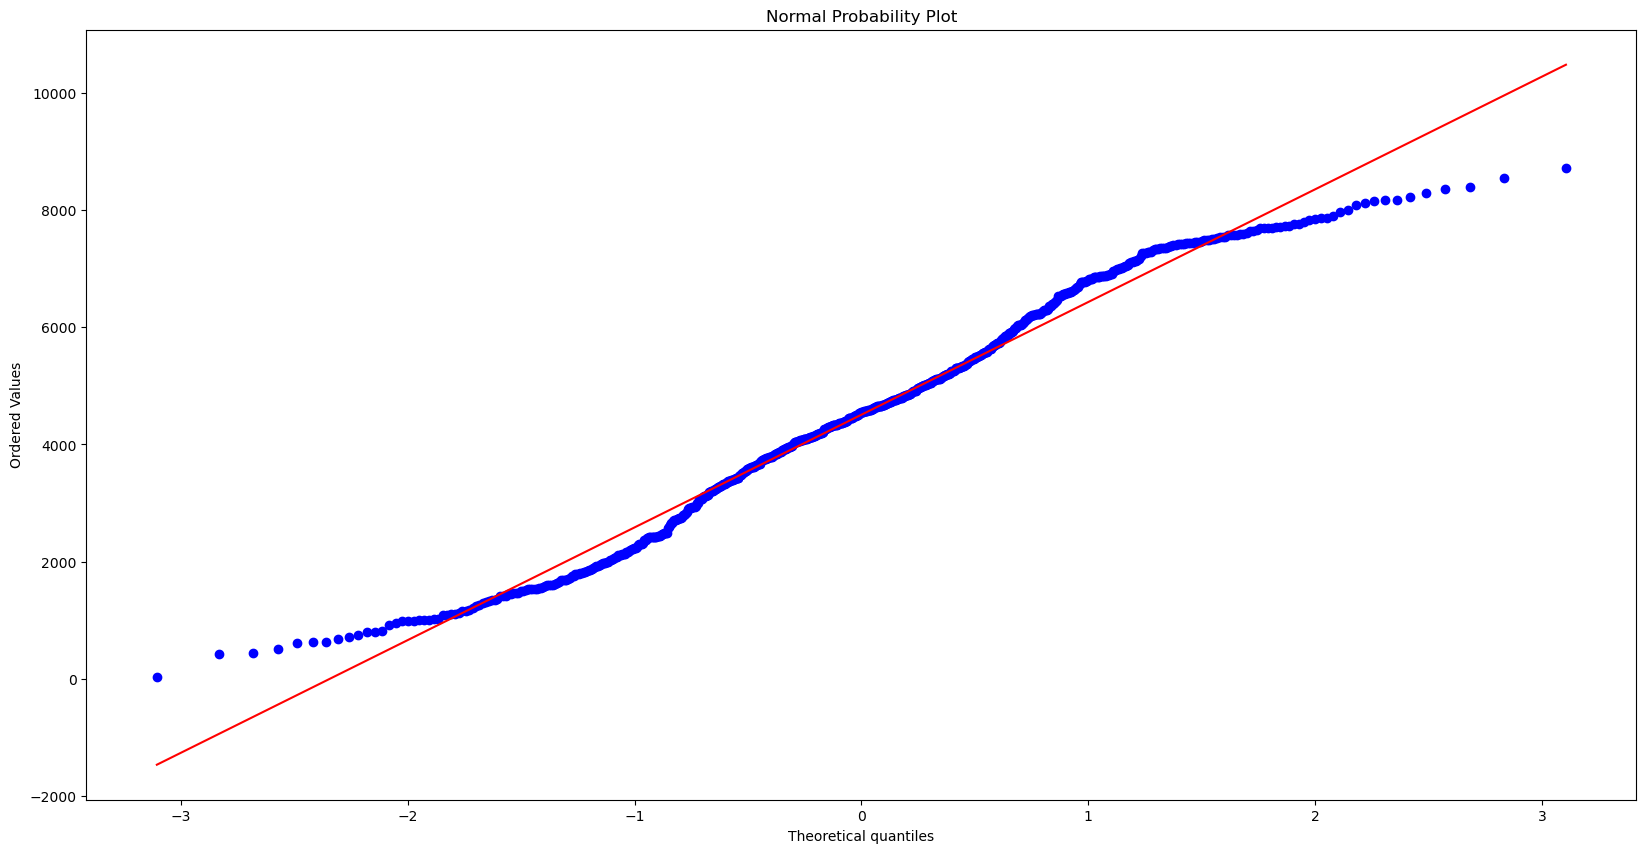

In [14]:
fig=plt.figure(figsize=(20,10))
stats.probplot(boombikes_data.cnt.tolist(),dist='norm',plot=plt)
plt.title("Normal Probability Plot")
plt.show()

There is not much departure from normality and also less outliers detected

# Step 3: Data Preparation

## Dummy Variables

The variable ['season','mnth','weekday','weathersit'] has multiple levels. Lets convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [15]:
categorical_col = ['season','mnth','weekday','weathersit']
boombikes_data_dummy_var = pd.get_dummies(data=boombikes_data, columns = categorical_col, drop_first=True)
boombikes_data_dummy_var.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


# Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [16]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes_data_dummy_var, train_size = 0.7, random_state = 100)

In [17]:
#Verifying the data rows in each data set
print("Total: ",boombikes_data_dummy_var.shape)
print("Train: ",df_train.shape)
print("Test: ",df_test.shape)

Total:  (730, 29)
Train:  (510, 29)
Test:  (220, 29)


### Rescaling the Features 

Scaling doesn't impact our model. Here we can see that values of few features are lying withing smaller range and for few features the range is on higher side . So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

- Using Min-Max scaling to get all the values withing the range of 0 to 1

In [18]:
#Creating scaler object
scaler = MinMaxScaler()

In [19]:
# Applying scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
#Validating if scaled values are within 0 to 1 range
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


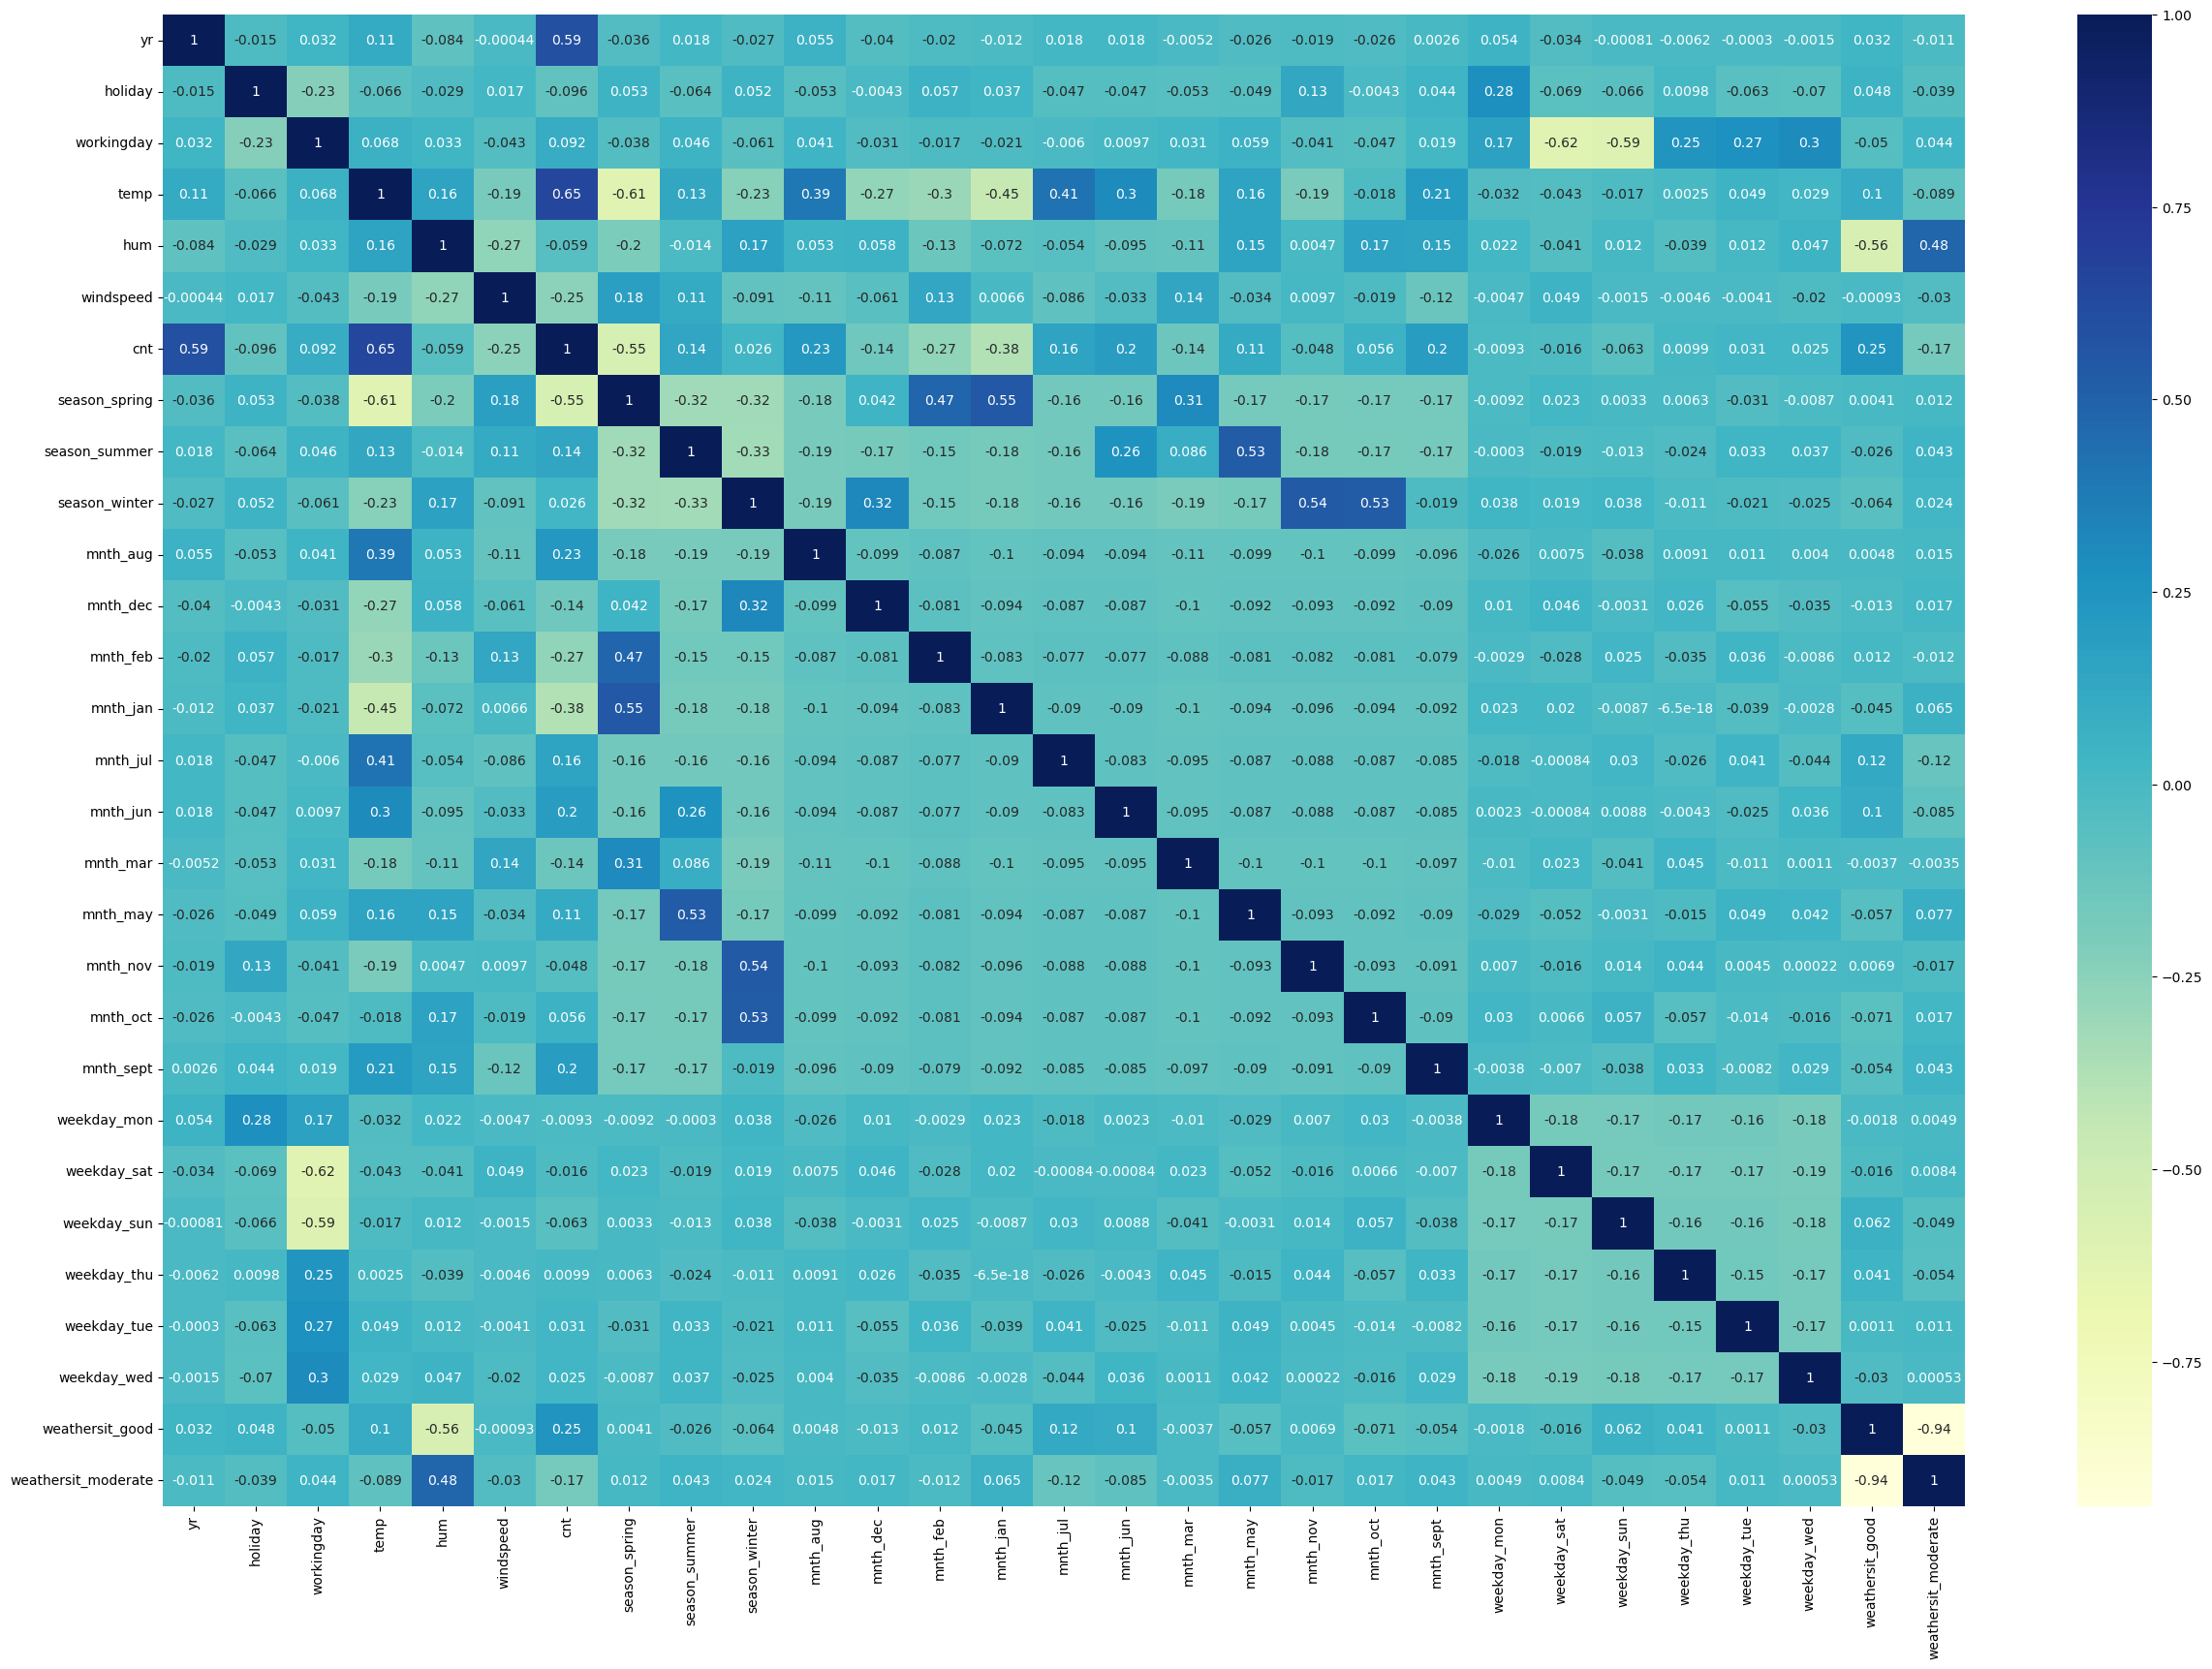

In [22]:
#checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Observation:
- 'cnt' is highly corelated with 'temp' and 'yr'

Plotting a scatter plot `temp` vs `cnt`

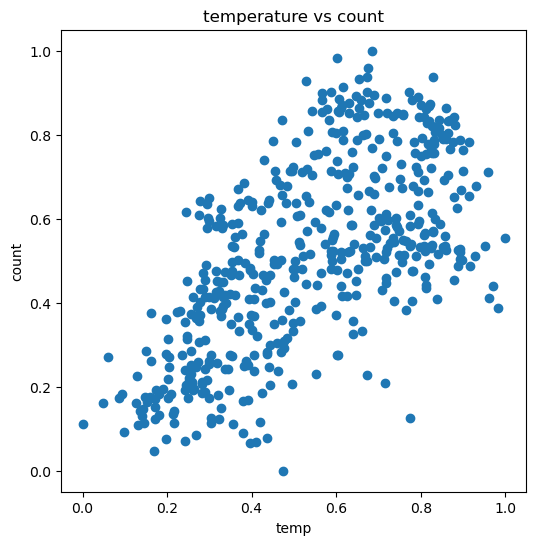

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('temp')
plt.ylabel('count')
plt.title('temperature vs count')
plt.show()

Let's take `temp` as a first variable and will try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a linear model

Fiting a regression line through the training data using `statsmodels`. We need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

## Manual: Model#1 using one variable `temp`

In [25]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

params=lr.params

params

const    0.169031
temp     0.640944
dtype: float64

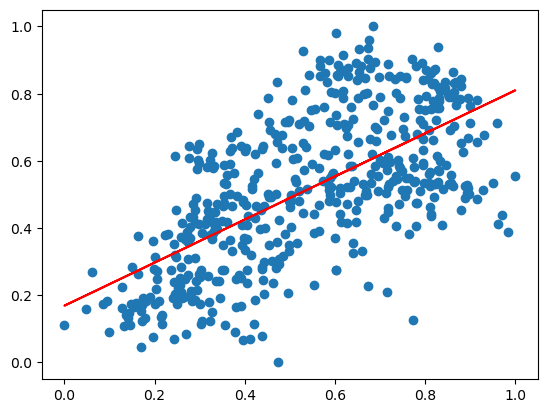

In [26]:
# visualizing the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], params['const']+ params['temp']* X_train_lm.iloc[:, 1], 'r')
plt.show()

In [27]:
# Printing the summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           2.46e-61
Time:                        00:07:47   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

## Manual: Model#2 using 3 variables `temp` `yr` `workingday`

In [28]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','workingday']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# Check the parameters obtained

lr.params

const         0.069276
temp          0.581967
yr            0.236348
workingday    0.016887
dtype: float64

In [29]:
# Printing the summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     380.3
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.26e-129
Time:                        00:07:47   Log-Likelihood:                 339.82
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     506   BIC:                            -654.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0693      0.016      4.212      0.0

### As there are 30 variable, it would not be an efficient way to keep adding or removing column one by one 

## Model Selection using RFE

In [30]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 3),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 14),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 4),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 11),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_oct', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['season_spring', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [34]:

#Define function for linear model using statsmodel
def build_model_sm(X_train_rfe_var):
    
    #Adding a constant variable 
    X_train_rfe_sm = sm.add_constant(X_train_rfe_var)
    lm = sm.OLS(y_train,X_train_rfe_sm).fit()  

    #Let's see the summary of our linear model
    print(lm.summary())

    #Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_rfe_var
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

    return lm

## Automated : Model#1 with 15 variables

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          8.70e-192
Time:                        00:07:48   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0335    

### Dropping `workingday` as it has high VIF

## Automated : Model#2 with 14 variables



In [36]:

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)
# Adding a constant variable 

build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          8.70e-192
Time:                        00:07:48   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0080    

### Dropping `weekday_sat` as it has high P value

## Automated : Model#3 with 13 variables

In [37]:

X_train_rfe=X_train_rfe.drop(['weekday_sat'],axis=1)

build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          7.84e-193
Time:                        00:07:48   Log-Likelihood:                 518.22
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     496   BIC:                            -949.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0054    

### Dropping `hum` as it has high VIF

## Automated : Model#4 with 12 variables

In [38]:

X_train_rfe=X_train_rfe.drop(['hum'],axis=1)
build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.6
Date:                Tue, 09 May 2023   Prob (F-statistic):          2.00e-189
Time:                        00:07:48   Log-Likelihood:                 507.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     497   BIC:                            -933.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1498    

### Dropping `mnth_oct` as it has high P value

## Automated : Model#5 with 11 variables

In [39]:

X_train_rfe=X_train_rfe.drop(['mnth_oct'],axis=1)
build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.8
Date:                Tue, 09 May 2023   Prob (F-statistic):          8.46e-190
Time:                        00:07:48   Log-Likelihood:                 505.37
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     498   BIC:                            -935.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1485    

### Dropping `weathersit_good` as it has high VIF. Even though `temp` has greater VIF value we would not drop it becuase as per the domain understanding we know that it is a useful column and dropping it would impact the model adversely 

## Automated : Model#6 with 10 variables

In [40]:
X_train_rfe=X_train_rfe.drop(['weathersit_good'],axis=1)
build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     193.5
Date:                Tue, 09 May 2023   Prob (F-statistic):          1.33e-164
Time:                        00:07:48   Log-Likelihood:                 442.98
No. Observations:                 510   AIC:                            -864.0
Df Residuals:                     499   BIC:                            -817.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1341    

### Dropping `mnth_aug` as per manual analysis and domain expertise

## Automated : Model#7 with 9 variables

In [41]:
X_train_rfe=X_train_rfe.drop(['mnth_aug'],axis=1)
lm=build_model_sm(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.99e-164
Time:                        00:07:48   Log-Likelihood:                 438.66
No. Observations:                 510   AIC:                            -857.3
Df Residuals:                     500   BIC:                            -815.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1296    

###  This model can be finalized as it can be observed that every variable in the chosen model has a VIF<5 which ensures that there is no mulitcollinearity.



# Step 6: Residual Analysis of the train data



In [42]:
y_train_pred = lm.predict(sm.add_constant(X_train_rfe))

### 1.Assumption Validation: if error terms are normally distributed

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

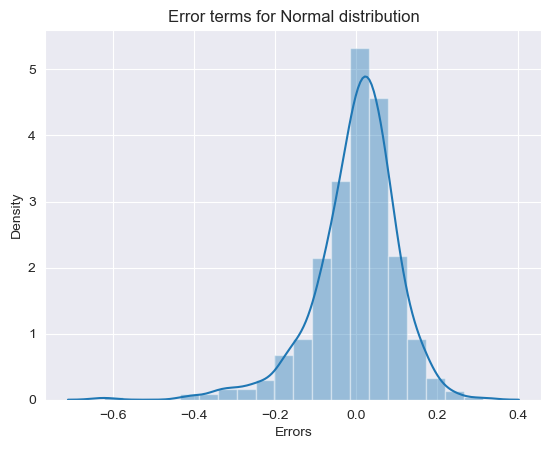

In [43]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution

# Plot the histogram of the error terms
fig = plt.figure()
sns.set_style("darkgrid")
sns.distplot((res), bins = 20)
               # Plot heading 
plt.xlabel('Errors')                         # X-label
plt.title('Error terms for Normal distribution')
plt.show()

                    

### 2.Assumption Validation: if error terms are independent of each other

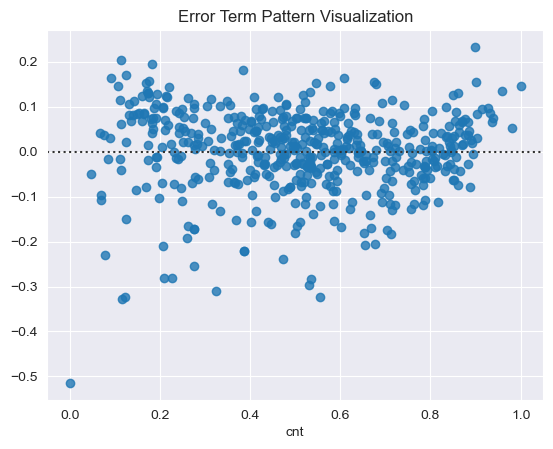

In [44]:
# Residual analysis to verify if error terms are independent of each other
sns.set_style("darkgrid")
sns.residplot(x=y_train, y=y_train - y_train_pred)
plt.title("Error Term Pattern Visualization")
plt.show()

### 3.Assumption Validation: Model is Homoscedastic or not

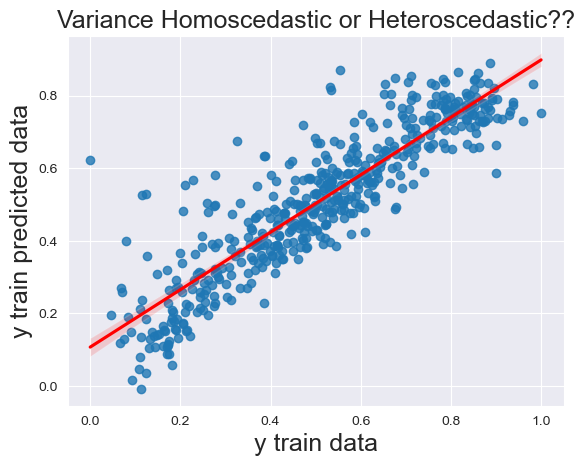

In [45]:
fig = plt.figure()
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "red"})
# Plot heading
plt.title('Variance Homoscedastic or Heteroscedastic??', fontsize = 18)
# X-label
plt.xlabel('y train data', fontsize = 18)                          
plt.ylabel('y train predicted data', fontsize = 18)
plt.show()

### Observations for the assumptions of Linear regression


1. Normal Distribution: The error distribution is normal (i.e concentrated around 0) which is another assumption of linear regression.

2. Independent from each other : There is not pattern detected so it can be concluded that error terms are independent of each other

3. Error terms has constant Variance: Variance is constant. Hence we can say heteroscedasticity is not observed in the error terms. So model is truely homoscedastic

# Step 7: Making Predictions and Evaluation Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model. I.e Model no 7 with 9 variables.

In [46]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [47]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [48]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
#checking the values
y_test.head(5)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [51]:
X_test.head(5)

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [52]:
#Printing feature variables

X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_sept', 'weekday_sun', 'weathersit_moderate'],
      dtype='object')

In [53]:
# Creating X_test_final dataframe 
X_test_final = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_final = sm.add_constant(X_test_final)

In [54]:
# Making predictions using the final model

y_test_pred = lm.predict(X_test_final)

# R2 Score for Train and Test Dataset

In [55]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score of train dataset is', r2_train)

#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print('r2 score of test dataset is', r2_test)


r2 score of train dataset is 0.7914735022829061
r2 score of test dataset is 0.7700449632561788


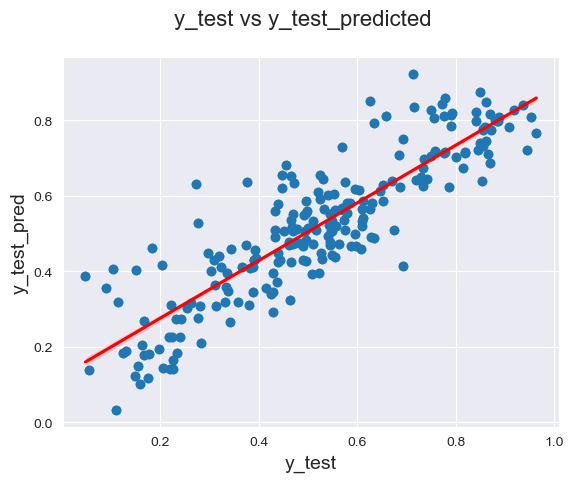

In [56]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_predicted', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 14) 
plt.show()

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     210.9
Date:                Tue, 09 May 2023   Prob (F-statistic):          5.99e-164
Time:                        00:07:49   Log-Likelihood:                 438.66
No. Observations:                 510   AIC:                            -857.3
Df Residuals:                     500   BIC:                            -815.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1296    

## Equation of the best fitted line is:
    cnt = 0.2385*yr  - 0.0915*holiday + 0.5489*temp -0.1820*windspeed + 0.0879*season_summer + 0.1165*season_winter + 0.0892*mnth_sept - 0.0428*weekday_sun - 0.0667*weathersit_moderate + 0.1296


In [58]:
#finding out the mean squared error for train and test

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_test_pred))
print('Mean squared error of train dataset is', train_mse)
print('Mean squared error of test dataset is', test_mse)

Mean squared error of train dataset is 0.010481785865095284
Mean squared error of test dataset is 0.010995134401018366


Since model's mean squared error is almost 0, it implies that the model accurately predicts the variance between  the test and train datasets

# Summary:

The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

1) The R-squared value of the train set is 79.15% whereas the test set has a value of 77.00% which suggests that the model broadly explains the variance quite accurately on the test set and thus it can be concluded that it is a good model. 

2) Developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.  

3) Following independent variables helped to conclude the model with good accuracy
- yr                      
- holiday                
- temp                    
- windspeed              
- season_summer          
- season_winter           
- mnth_sept               
- weekday_sun            
- weathersit_moderate    


